#Project 12 - FIFA Player Value Prediction

---
###Group: 1
###Section: C02
###Members: Aleksandar Georgievski (400248584), Vasisht Vikram Chari (001404120), Basem Yassa (400013113), Tie Jiang (001427611)

#Data Pre-Processing


## Loading data and importing libraries

In [1]:
# Step 1 - Import necessary libraries
!kaggle datasets download -d maso0dahmed/football-players-data
!unzip \*.zip
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import MinMaxScaler

# Step 2 - Load the test dataset
dataset = pd.read_csv("fifa_players.csv")

# Step 3 - Modify the test dataset
dataset.drop(['name',
 'full_name',
 'birth_date',
 'nationality',
 'body_type',
 'national_team',
 'national_rating',
 'national_team_position',
 'national_jersey_number'],axis=1,inplace=True)
print(dataset.isna().sum())
dataset.drop(["release_clause_euro"],axis=1,inplace=True) #Contained 1837 values which is a lot more than other columns
dataset.dropna(inplace=True)

Dataset URL: https://www.kaggle.com/datasets/maso0dahmed/football-players-data
License(s): Apache 2.0
 81% 1.00M/1.24M [00:00<00:00, 1.95MB/s]
100% 1.24M/1.24M [00:00<00:00, 2.29MB/s]
Archive:  football-players-data.zip
  inflating: fifa_players.csv        
age                                 0
height_cm                           0
weight_kgs                          0
positions                           0
overall_rating                      0
potential                           0
value_euro                        255
wage_euro                         246
preferred_foot                      0
international_reputation(1-5)       0
weak_foot(1-5)                      0
skill_moves(1-5)                    0
release_clause_euro              1837
crossing                            0
finishing                           0
heading_accuracy                    0
short_passing                       0
volleys                             0
dribbling                           0
curve               

### Splitting the positions column to individual columns

In [2]:
# Step 4 - Pre-process the Test Dataset
mlb = MultiLabelBinarizer()
positions = dataset["positions"]
positions_transformed = mlb.fit_transform([i.split(',') for i in positions])
positions = pd.DataFrame(positions_transformed, columns=mlb.classes_, index=dataset.index)
dataset=pd.concat([dataset.drop('positions', axis=1), positions], axis=1)

dataset.loc[(dataset["preferred_foot"]=="Left"),"preferred_foot"]=0
dataset.loc[(dataset["preferred_foot"]=="Right"),"preferred_foot"]=1

In [3]:
dataset.shape

(17699, 55)

## Linear Correlations

<Axes: >

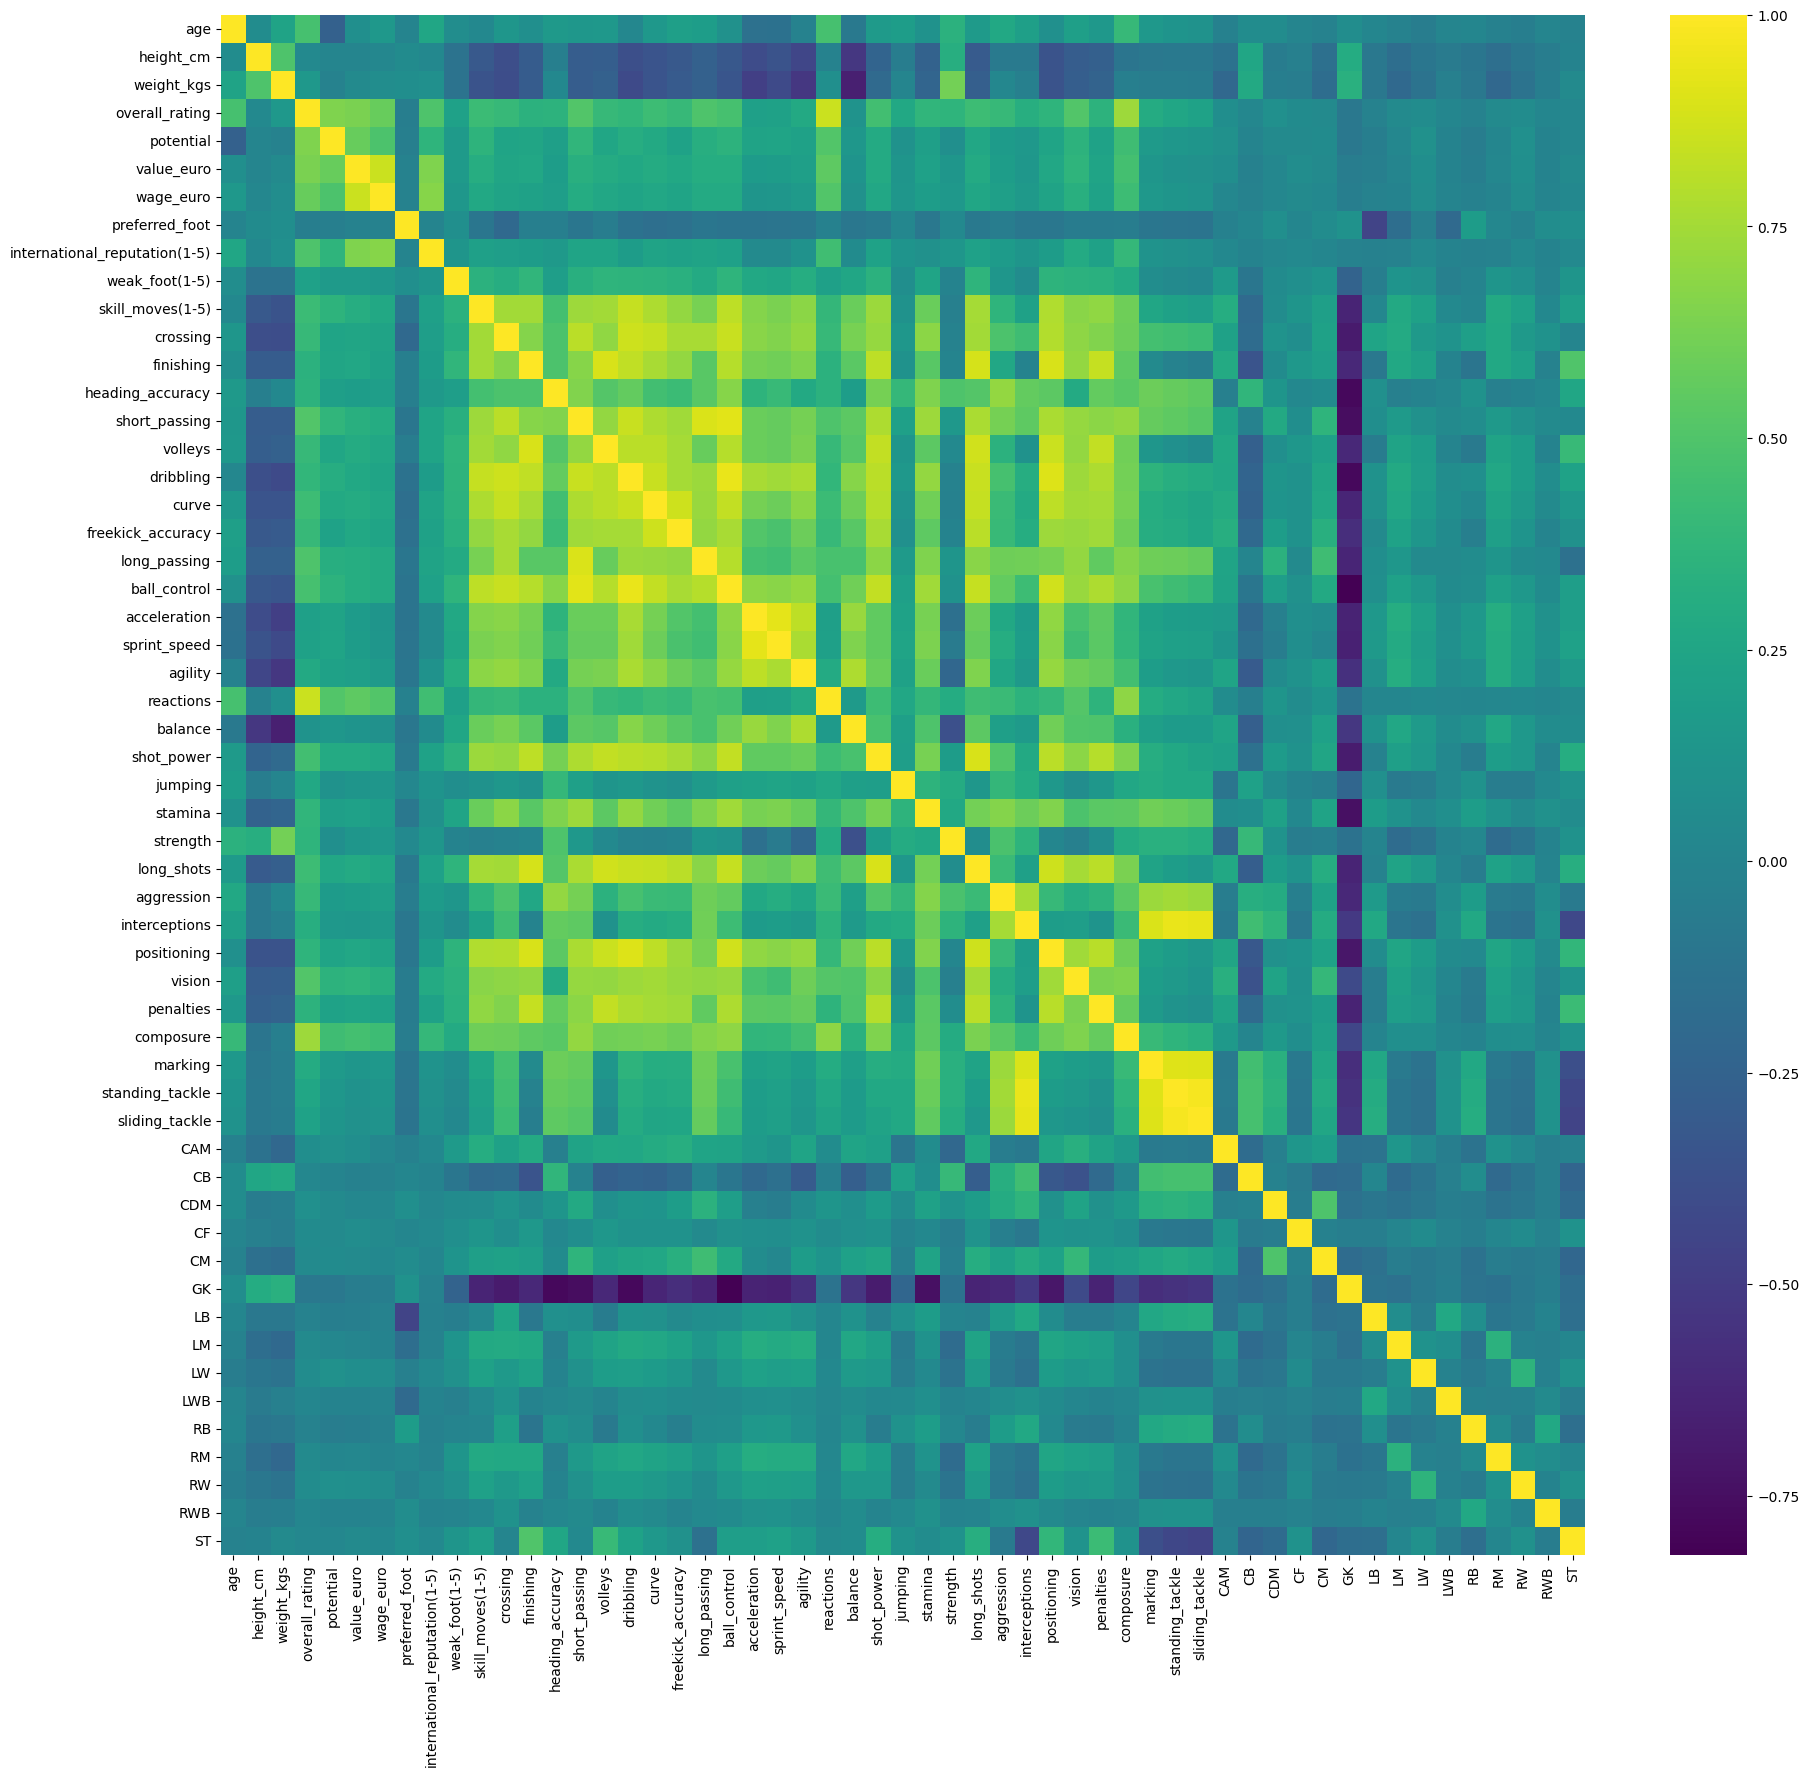

In [4]:
# Step 5 - Visualize the Test Dataset (Linear Correlations)
fig, ax = plt.subplots(figsize=(22, 20))
corr = dataset.corr()
sns.heatmap(corr, cmap ='viridis')

<ipython-input-5-5f990e71de59>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax = axes[0],x=val_corr.index,y=val_corr.values, palette='coolwarm')
<ipython-input-5-5f990e71de59>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax = axes[1],x=wage_corr.index,y=wage_corr.values, palette='coolwarm')


[Text(0.5, 1.0, 'Correlation with wage_euro'),
 Text(0.5, 0, 'Features'),
 Text(0, 0.5, 'Correlation')]

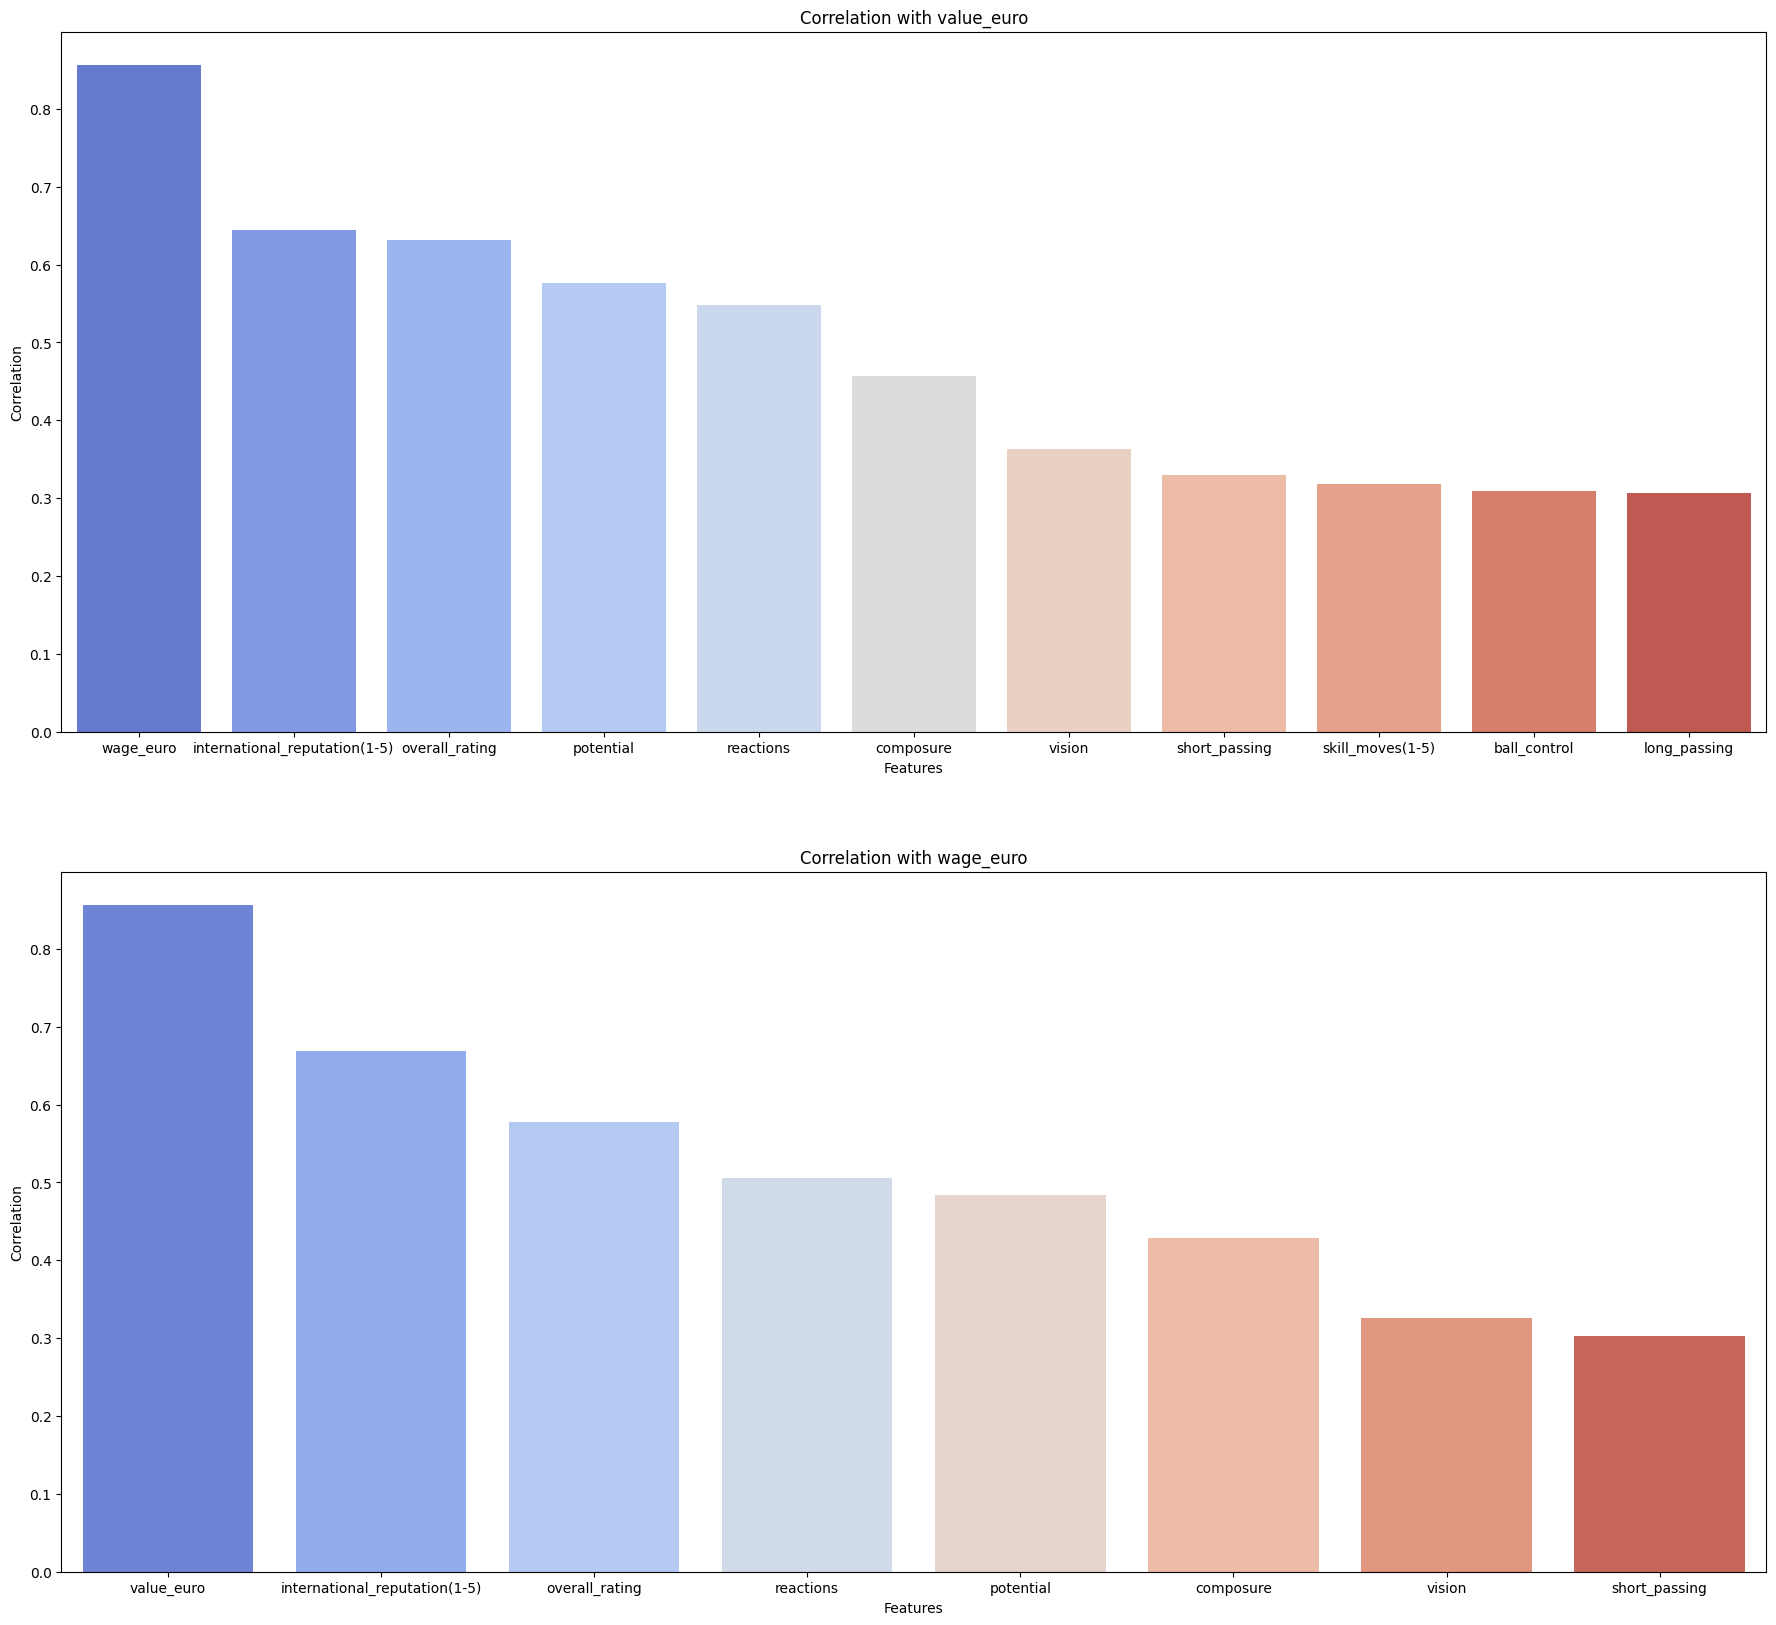

In [5]:
fig, axes = plt.subplots(nrows=2, ncols=1,figsize=(22, 20))
val_corr = corr["value_euro"][abs(corr["value_euro"])>0.3].drop(["value_euro"]).sort_values(ascending=False)
wage_corr = corr["wage_euro"][abs(corr["wage_euro"])>0.3].drop(["wage_euro"]).sort_values(ascending=False)
sns.barplot(ax = axes[0],x=val_corr.index,y=val_corr.values, palette='coolwarm')
axes[0].set(title='Correlation with value_euro',xlabel='Features', ylabel='Correlation')
sns.barplot(ax = axes[1],x=wage_corr.index,y=wage_corr.values, palette='coolwarm')
axes[1].set(title='Correlation with wage_euro',xlabel='Features', ylabel='Correlation')


## Non-linear Correlations

<Axes: >

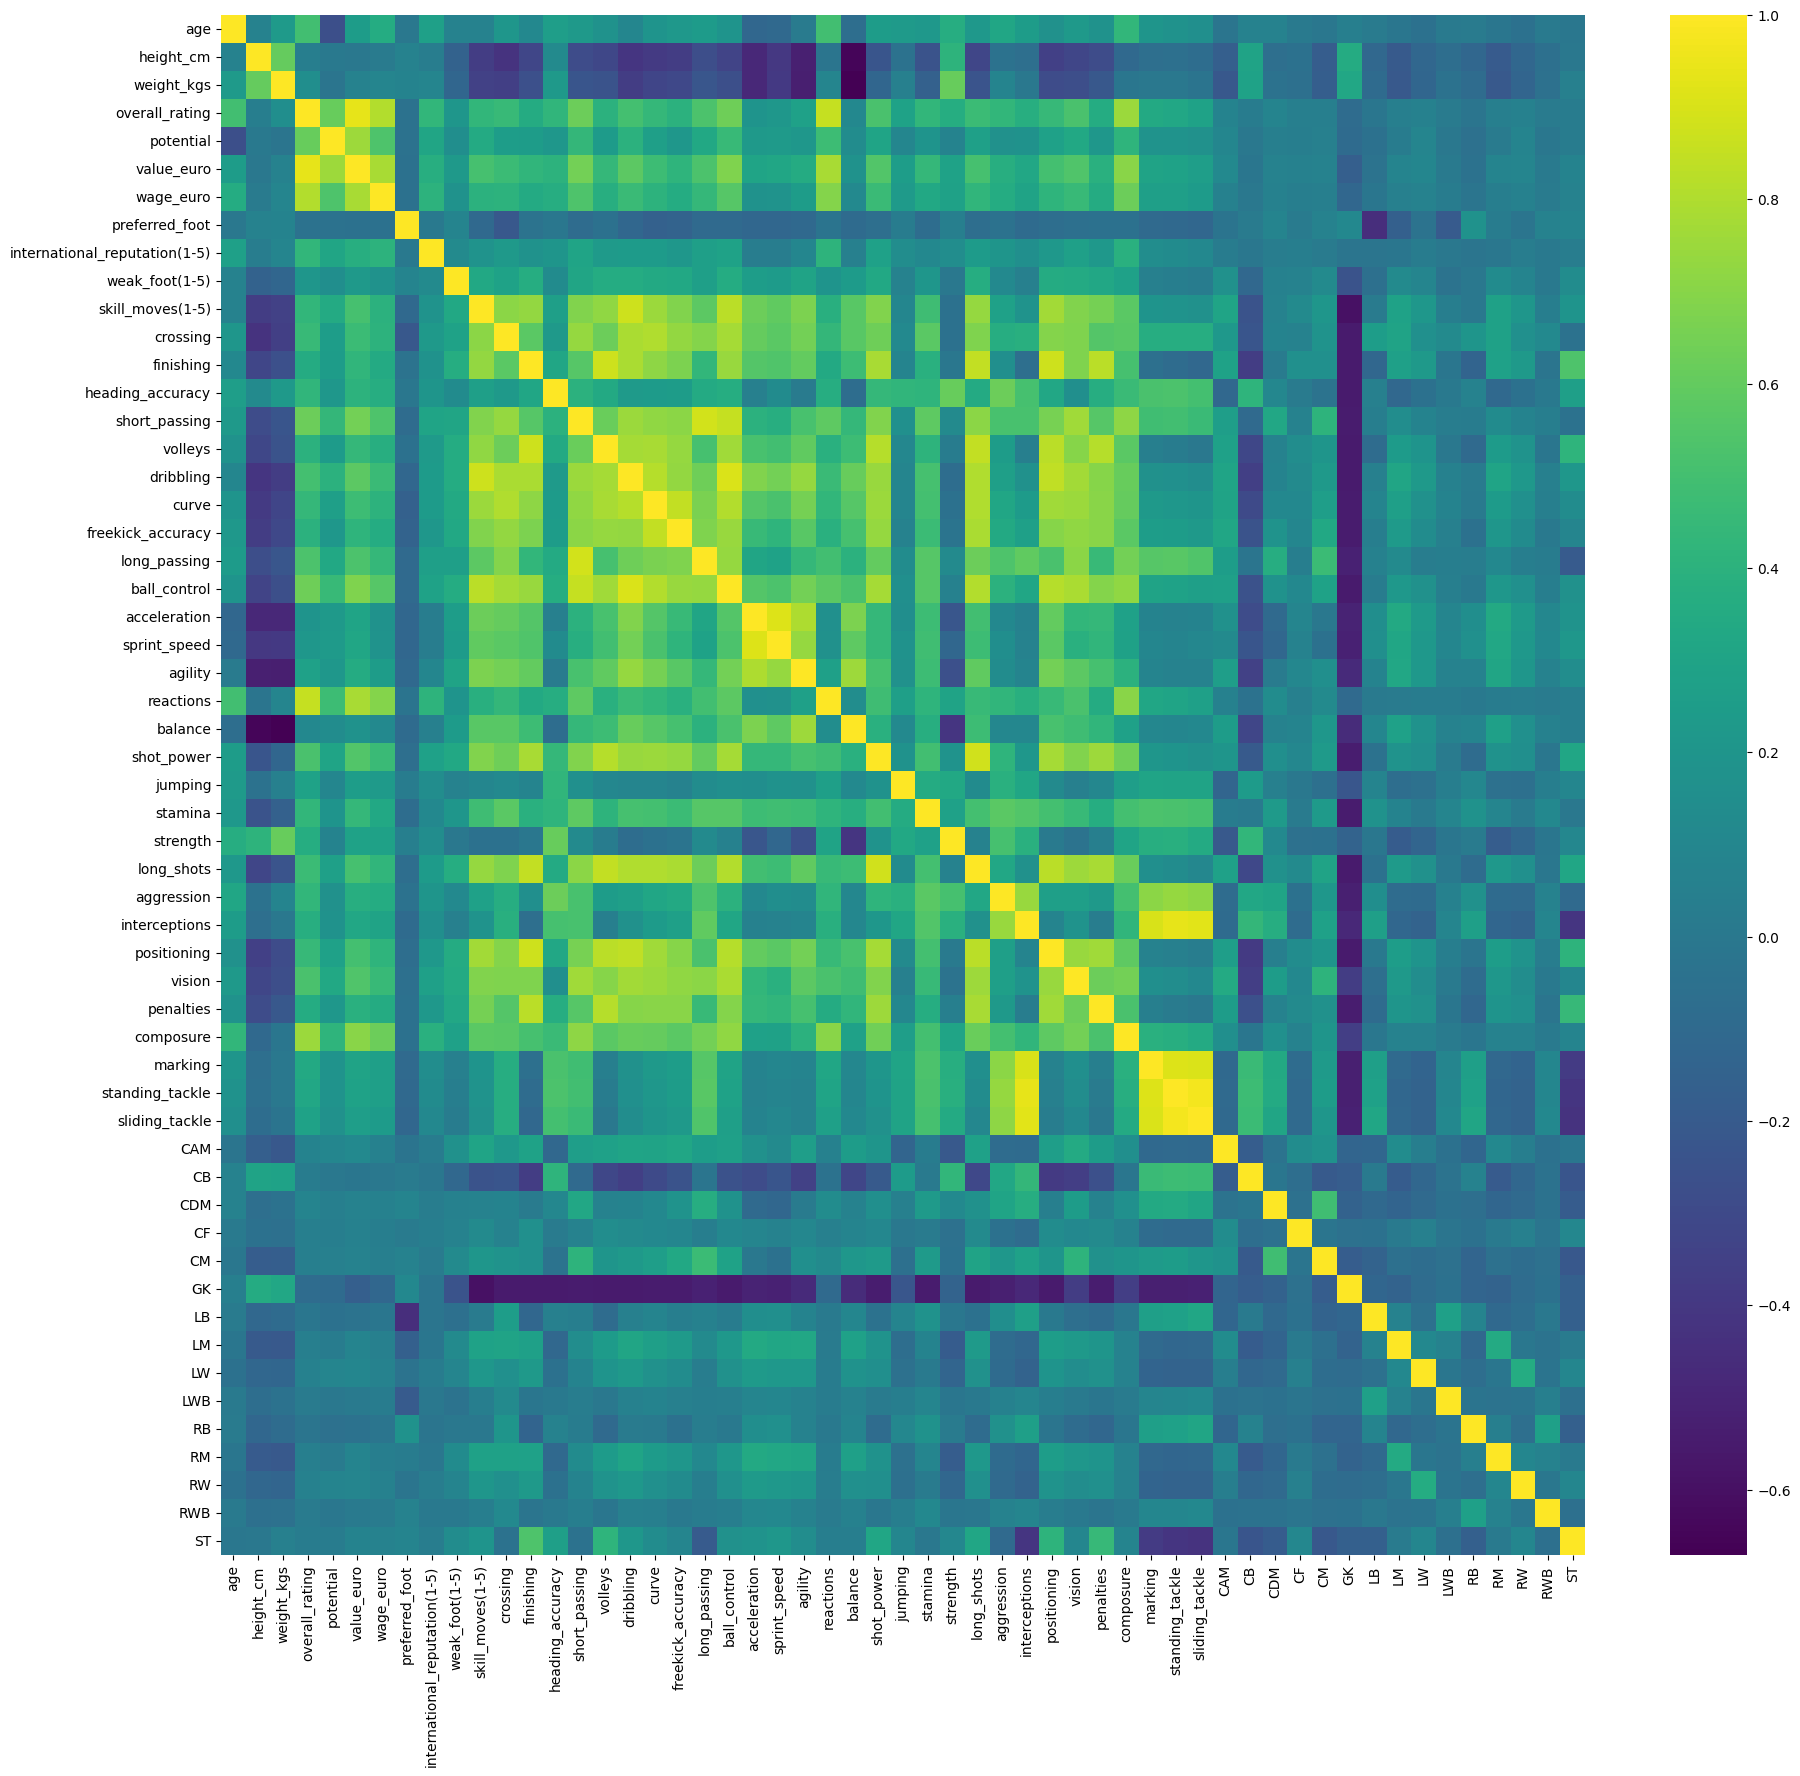

In [6]:
# Step 6 - Visualize the Test Dataset (Non-Linear Correlations)
fig, ax = plt.subplots(figsize=(22, 20))
corr = dataset.corr(method='spearman')
sns.heatmap(corr, cmap ='viridis')

<ipython-input-7-d054632fcd93>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax = axes[0],x=val_corr.index,y=val_corr.values, palette='coolwarm')
<ipython-input-7-d054632fcd93>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax = axes[1],x=wage_corr.index,y=wage_corr.values, palette='coolwarm')


[Text(0.5, 1.0, 'Correlation with wage_euro'),
 Text(0.5, 0, 'Features'),
 Text(0, 0.5, 'Correlation')]

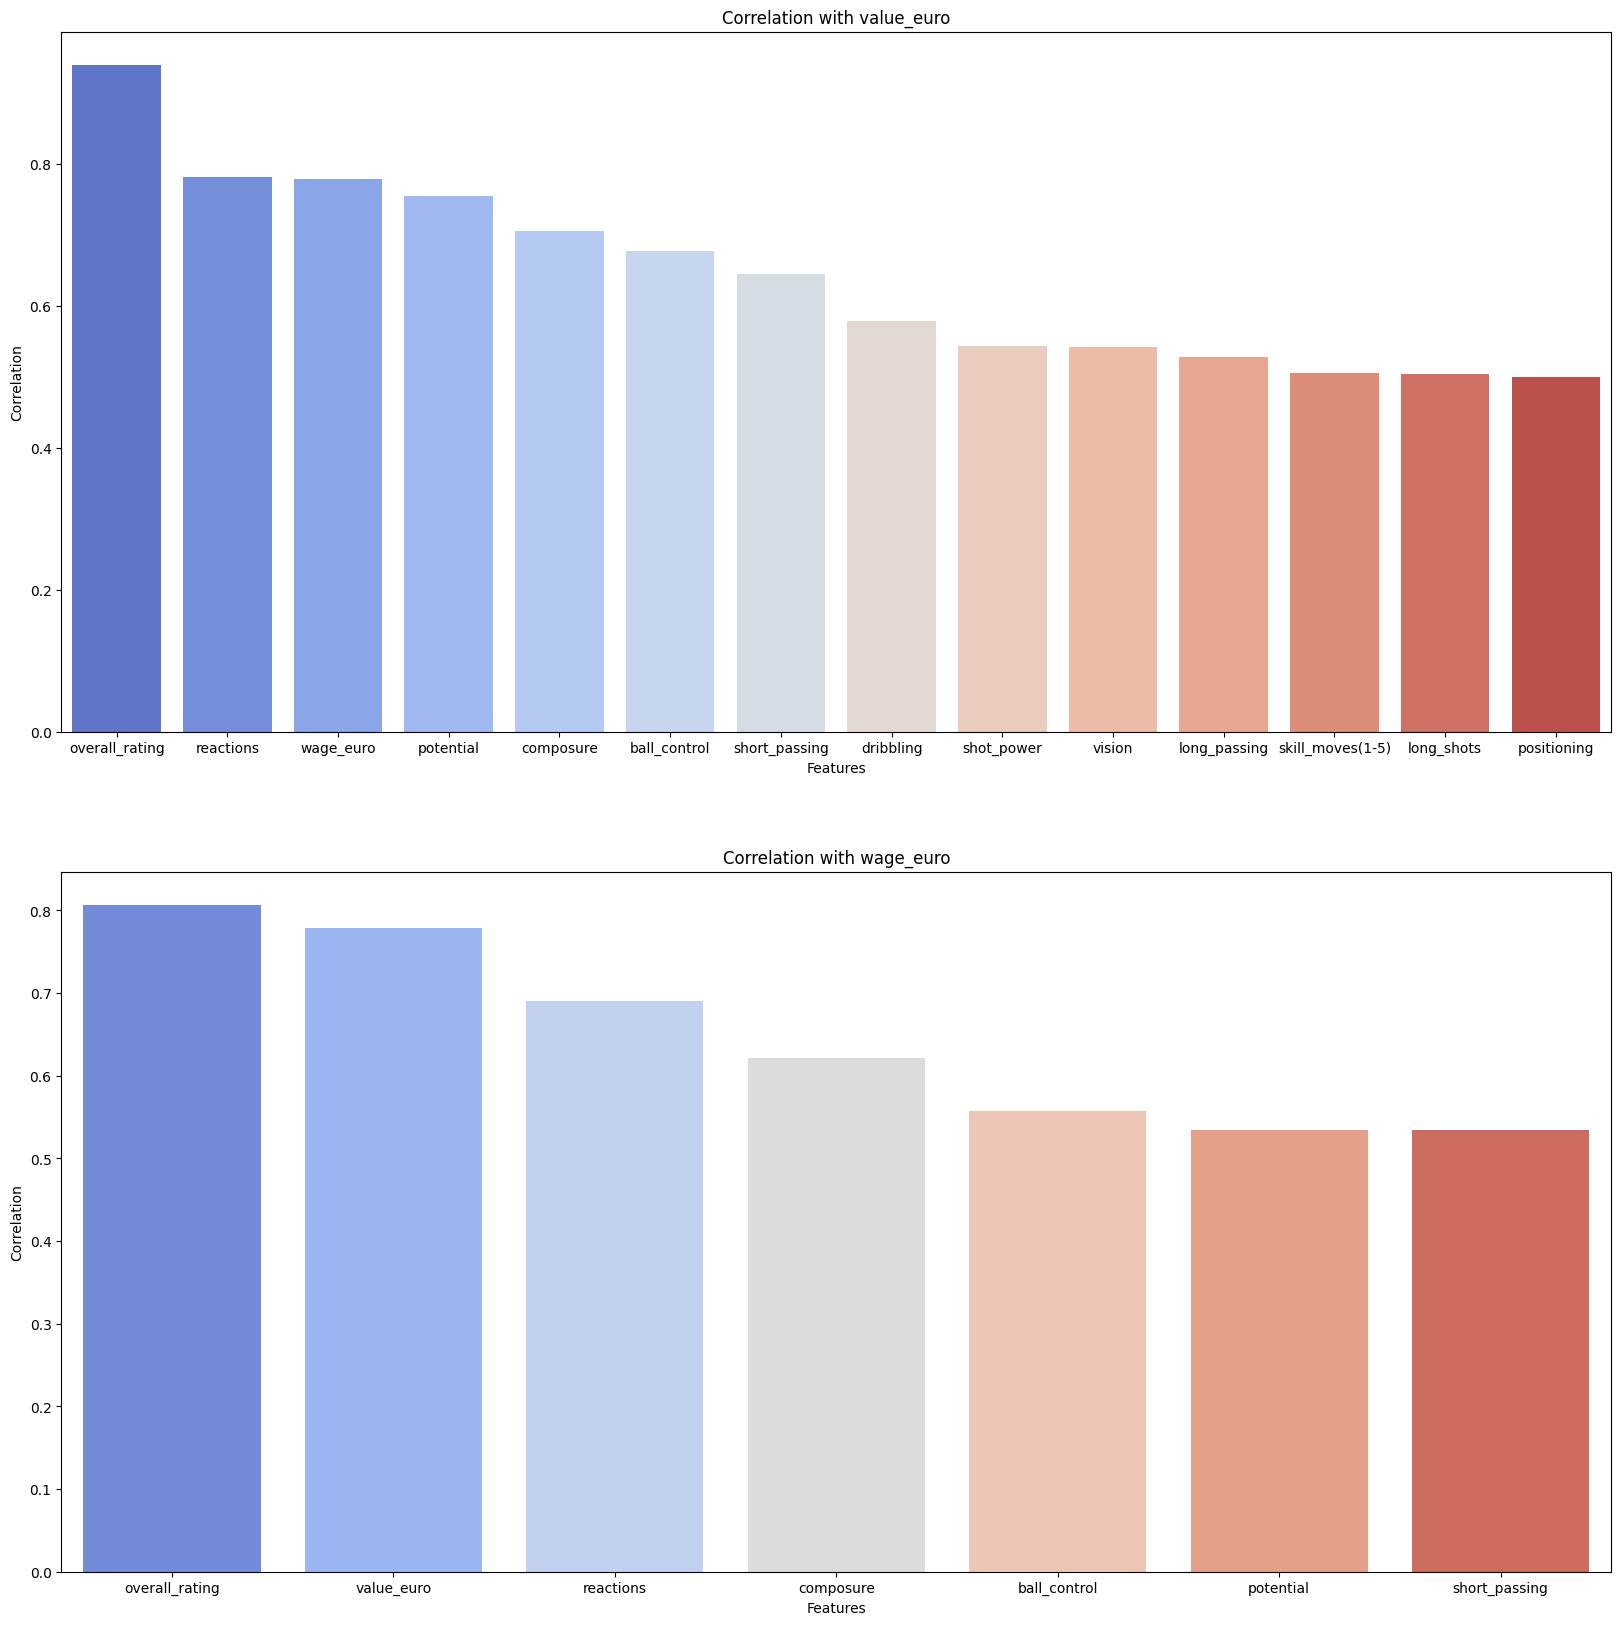

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=1,figsize=(20, 20))
val_corr = corr["value_euro"][abs(corr["value_euro"])>0.5].drop(["value_euro"]).sort_values(ascending=False)
wage_corr = corr["wage_euro"][abs(corr["wage_euro"])>0.5].drop(["wage_euro"]).sort_values(ascending=False)
sns.barplot(ax = axes[0],x=val_corr.index,y=val_corr.values, palette='coolwarm')
axes[0].set(title='Correlation with value_euro',xlabel='Features', ylabel='Correlation')
sns.barplot(ax = axes[1],x=wage_corr.index,y=wage_corr.values, palette='coolwarm')
axes[1].set(title='Correlation with wage_euro',xlabel='Features', ylabel='Correlation')

## Scaling all columns

In [8]:
# Step 7 - Normalize the Test Dataset
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(dataset)
scaled_dataset = pd.DataFrame(scaled_data, columns=dataset.columns, index=dataset.index)

## Confirming correlations were not affected

<ipython-input-9-1d2aebba3463>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax = axes[0],x=val_corr.index,y=val_corr.values, palette='coolwarm')
<ipython-input-9-1d2aebba3463>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax = axes[1],x=wage_corr.index,y=wage_corr.values, palette='coolwarm')


[Text(0.5, 0, 'Features'), Text(0, 0.5, 'Correlation')]

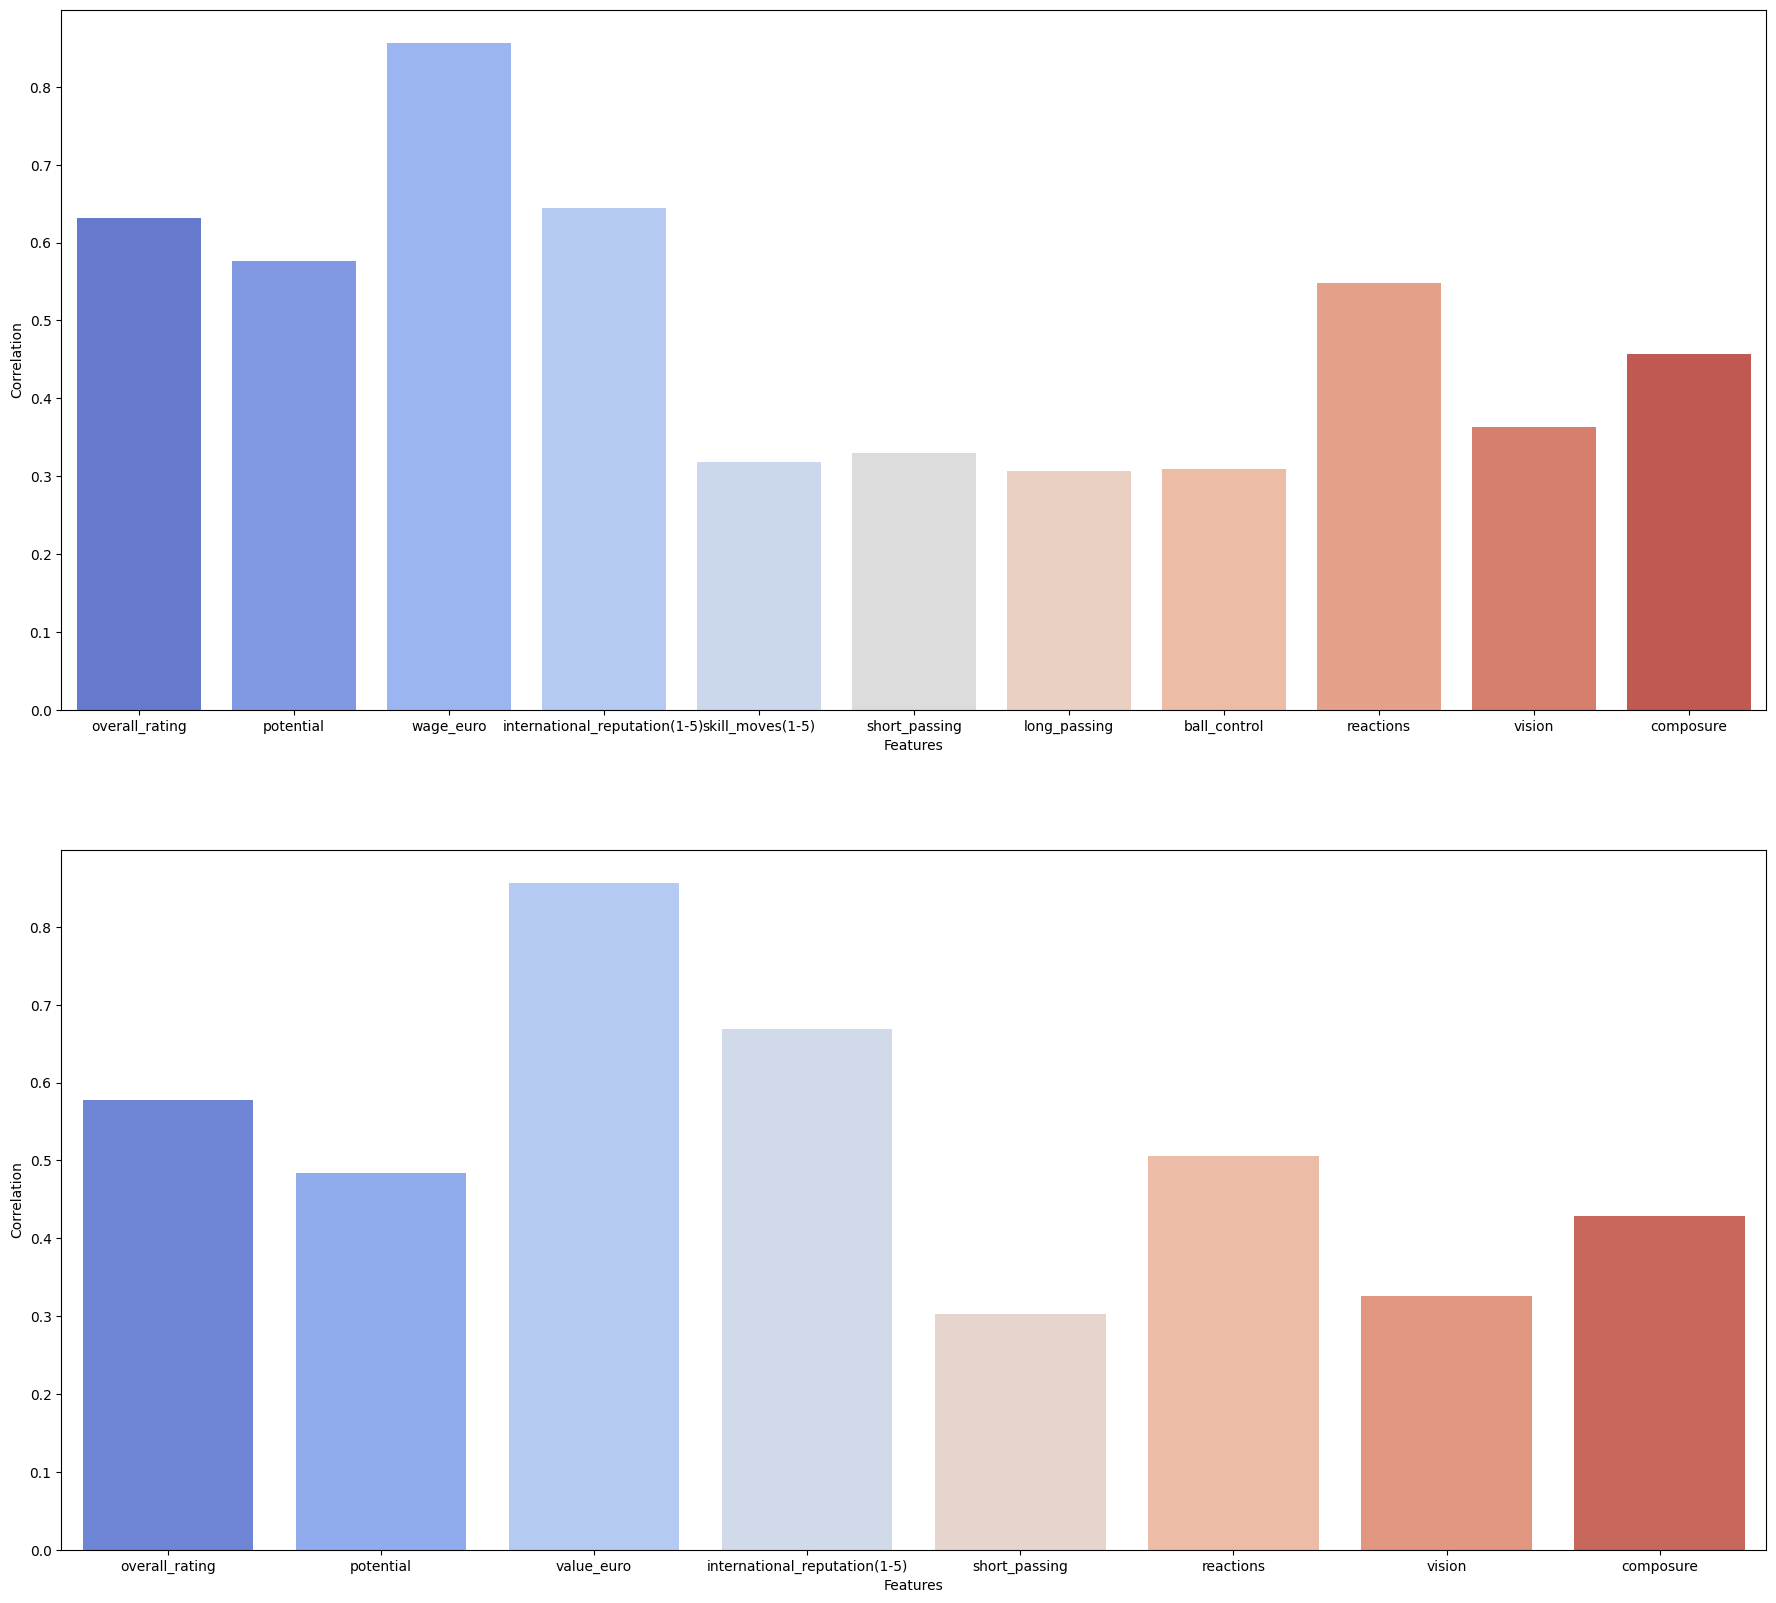

In [9]:
# Step 8 - Review the Test Dataset
fig, axes = plt.subplots(nrows=2, ncols=1,figsize=(22, 20))
corr = scaled_dataset.corr()
val_corr = corr["value_euro"][abs(corr["value_euro"])>0.3].drop(["value_euro"])
wage_corr = corr["wage_euro"][abs(corr["wage_euro"])>0.3].drop(["wage_euro"])
sns.barplot(ax = axes[0],x=val_corr.index,y=val_corr.values, palette='coolwarm')
axes[0].set(xlabel='Features', ylabel='Correlation')
sns.barplot(ax = axes[1],x=wage_corr.index,y=wage_corr.values, palette='coolwarm')
axes[1].set(xlabel='Features', ylabel='Correlation')


<ipython-input-10-103733a3aa68>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax = axes[0],x=val_corr.index,y=val_corr.values, palette='coolwarm')
<ipython-input-10-103733a3aa68>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax = axes[1],x=wage_corr.index,y=wage_corr.values, palette='coolwarm')


[Text(0.5, 0, 'Features'), Text(0, 0.5, 'Correlation')]

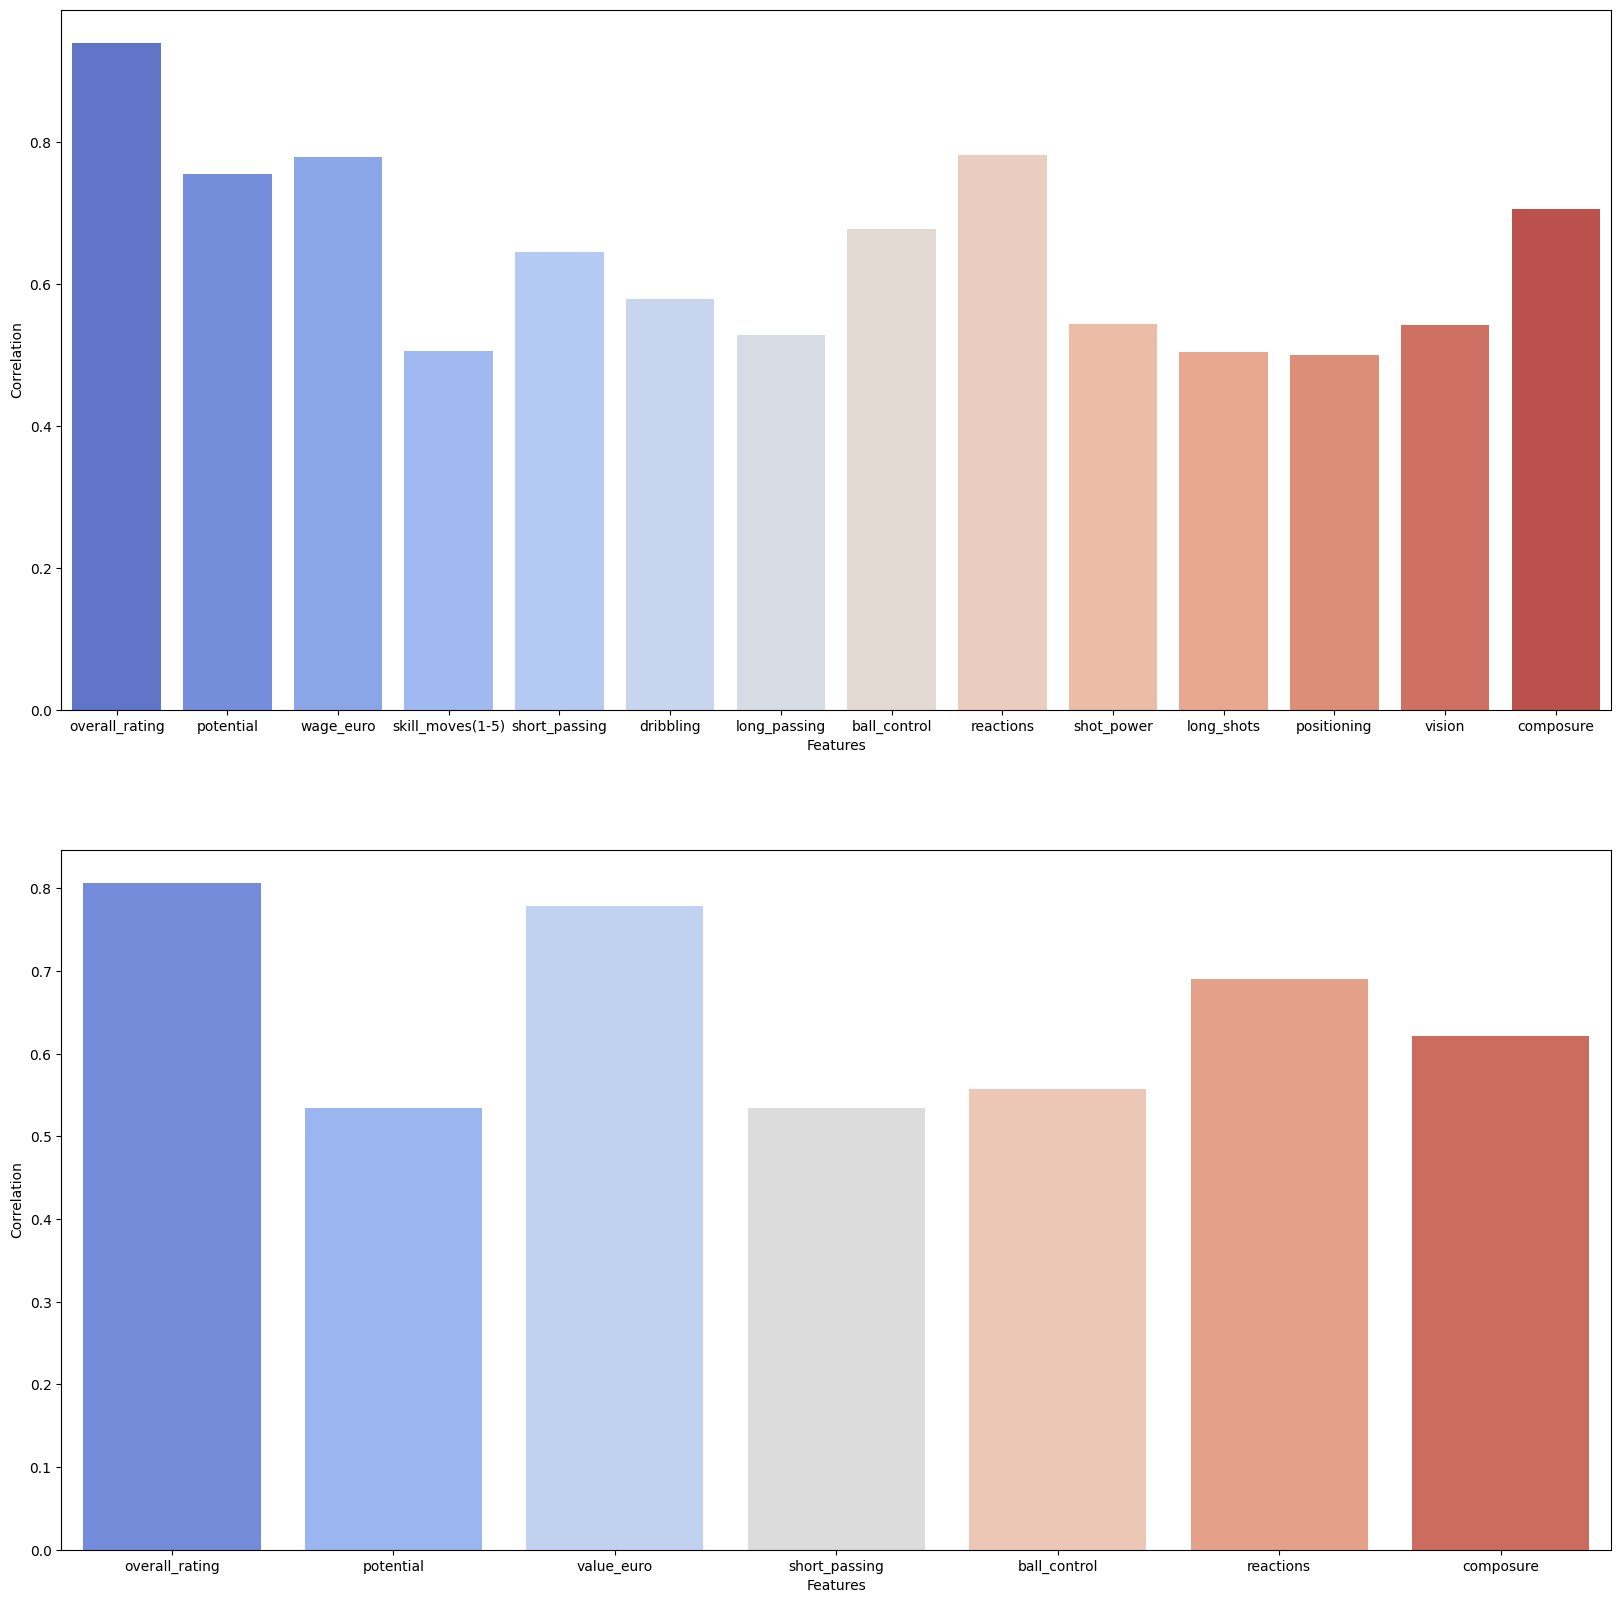

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=1,figsize=(20, 20))
corr = scaled_dataset.corr(method='spearman')
val_corr = corr["value_euro"][abs(corr["value_euro"])>0.5].drop(["value_euro"])
wage_corr = corr["wage_euro"][abs(corr["wage_euro"])>0.5].drop(["wage_euro"])
sns.barplot(ax = axes[0],x=val_corr.index,y=val_corr.values, palette='coolwarm')
axes[0].set(xlabel='Features', ylabel='Correlation')
sns.barplot(ax = axes[1],x=wage_corr.index,y=wage_corr.values, palette='coolwarm')
axes[1].set(xlabel='Features', ylabel='Correlation')

#Training the Model

##1. Defining the Training and Testing Datasets

In [11]:
# Step 9 - Import necessary libraries for model training
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.callbacks import EarlyStopping
import io

# Step 10 - Define variables
targets = dataset['value_euro'] #define the target variable as value_euro
features = scaled_dataset.drop(['value_euro'],axis=1) # define the features as all other columns except value_euro

# Step 11 - Splitting test and training sets
features_train, features_test, target_train, target_test = train_test_split(features, targets, test_size=0.20, random_state=42)

# Step 12 - Convert features and target to float32
features_train = features_train.astype('float32')
features_test = features_test.astype('float32')
target_train = target_train.astype('float32')
target_test = target_test.astype('float32')


##2. Baseline Model Development

In [12]:
# Step 13 - Set up baseline model
# Building the baseline model as a 4 hidden layers with 20% dropout for regularization and to prevent overfitting, and an output layer with 1 neuron for the target variable of player value
model_base = Sequential([
    Dense(200, activation='relu', input_shape=(features_train.shape[1],)),
    Dropout(0.2),
    Dense(50, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='relu')
])

# Step 14 - Set up the Optimizer
adamOpt = Adam(learning_rate=0.0001)
# Compile the model and specify the loss function as Mean Absolute Error
model_base.compile(optimizer=adamOpt, loss='mae', metrics=['mae'])

# Step 15 - Train the Baseline Model
history_base = model_base.fit(features_train, target_train, validation_data = (features_test, target_test), epochs=100, batch_size=50)


Epoch 1/100
284/284 [==============================] - 4s 4ms/step - loss: 2502062.5000 - mae: 2502062.5000 - val_loss: 2388093.7500 - val_mae: 2388093.7500
Epoch 2/100
284/284 [==============================] - 1s 3ms/step - loss: 2501985.5000 - mae: 2501985.5000 - val_loss: 2387948.0000 - val_mae: 2387948.0000
Epoch 3/100
284/284 [==============================] - 1s 4ms/step - loss: 2501741.7500 - mae: 2501741.7500 - val_loss: 2387592.0000 - val_mae: 2387592.0000
Epoch 4/100
284/284 [==============================] - 1s 5ms/step - loss: 2501255.2500 - mae: 2501255.2500 - val_loss: 2386964.0000 - val_mae: 2386964.0000
Epoch 5/100
284/284 [==============================] - 1s 4ms/step - loss: 2500471.2500 - mae: 2500471.2500 - val_loss: 2386004.5000 - val_mae: 2386004.5000
Epoch 6/100
284/284 [==============================] - 1s 3ms/step - loss: 2499324.7500 - mae: 2499324.7500 - val_loss: 2384665.0000 - val_mae: 2384665.0000
Epoch 7/100
284/284 [==============================] - 1s 

##3. Evaluating the Baseline Model Performance

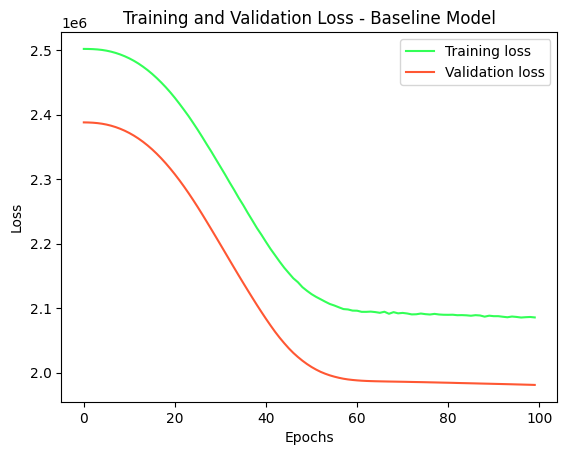

111/111 [==============================] - 0s 2ms/step
Mean Absolute Error: 1980815.1


In [13]:
# Step 16 - Plotting the training and validation loss from the model training to observe trends
plt.plot(history_base.history['loss'], color="#33FF57", label='Training loss')
plt.plot(history_base.history['val_loss'], color="#FF5733", label='Validation loss')
plt.title('Training and Validation Loss - Baseline Model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")
plt.show()

predictions = model_base.predict(features_test)
predictions = predictions.flatten()  # Flatten the predictions array
mae = np.mean(np.abs(predictions - target_test))
print("Mean Absolute Error:", mae)

#Identifying the Best Model for Training

## 1. Using Different Models, Tie (Optuna Hyperparameter Tuning)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 82.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 31.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.2/90.2 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 7.5 MB/s eta 0:00:00


[I 2024-07-28 21:10:21,143] A new study created in memory with name: no-name-2b86ea9b-c674-4f0c-82f8-283c941fb1de
[I 2024-07-28 21:11:03,373] Trial 0 finished with value: 1870075.25 and parameters: {'n_layers': 3, 'units_l0': 79, 'units_l1': 244, 'dropout_l1': False, 'units_l2': 69, 'dropout_l2': False, 'units_l3': 220, 'dropout_l3': True, 'dropout_rate_l3': 0.432386393832628, 'optimizer': 'SGD', 'learning_rate': 7.514655261178255e-05}. Best is trial 0 with value: 1870075.25.
[W 2024-07-28 21:11:14,807] Trial 1 failed with parameters: {'n_layers': 4, 'units_l0': 39, 'units_l1': 165, 'dropout_l1': True, 'dropout_rate_l1': 0.3956663987668696, 'units_l2': 159, 'dropout_l2': True, 'dropout_rate_l2': 0.20171291771861807, 'units_l3': 42, 'dropout_l3': True, 'dropout_rate_l3': 0.2982134555310184, 'units_l4': 52, 'dropout_l4': True, 'dropout_rate_l4': 0.2537646471363338, 'optimizer': 'SGD', 'learning_rate': 0.0022840944692179704} because of the following error: The value nan is not acceptable.

Number of finished trials:  50
Best trial:
  Value:  229975.21875
  Params: 
    n_layers: 2
    units_l0: 192
    units_l1: 110
    dropout_l1: True
    dropout_rate_l1: 0.20119700670997573
    units_l2: 255
    dropout_l2: False
    optimizer: Adam
    learning_rate: 0.00490613512135907
Epoch 1/100
443/443 [==============================] - 3s 4ms/step - loss: 2104780.2500 - mae: 2104780.2500 - val_loss: 1875924.7500 - val_mae: 1875924.7500
Epoch 2/100
443/443 [==============================] - 2s 5ms/step - loss: 1350077.8750 - mae: 1350077.8750 - val_loss: 858670.0625 - val_mae: 858670.0625
Epoch 3/100
443/443 [==============================] - 2s 5ms/step - loss: 840043.0625 - mae: 840043.0625 - val_loss: 692606.1250 - val_mae: 692606.1250
Epoch 4/100
443/443 [==============================] - 2s 4ms/step - loss: 692440.9375 - mae: 692440.9375 - val_loss: 571357.5625 - val_mae: 571357.5625
Epoch 5/100
443/443 [==============================] - 2s 4ms/step - loss: 625223.1250 - mae

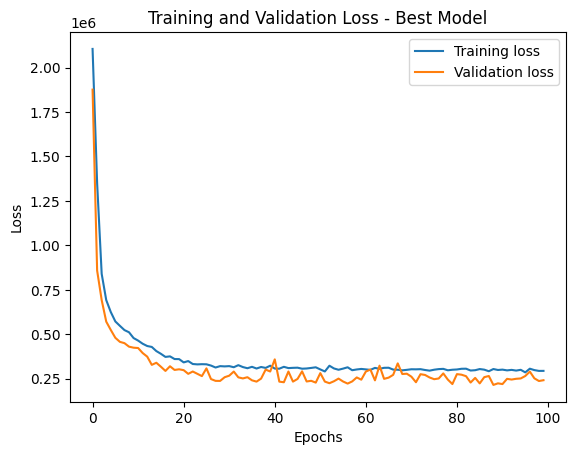

In [14]:
%pip install optuna-dashboard
import optuna
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.regularizers import l2



#split data - features and target
targets = dataset['value_euro']
features = scaled_dataset.drop(['value_euro'], axis=1)

#splt data - training and testing sets
features_train, features_test, target_train, target_test = train_test_split(features, targets, test_size=0.20, random_state=42)

#connvert features and target to float
features_train = features_train.astype('float32')
features_test = features_test.astype('float32')
target_train = target_train.astype('float32')
target_test = target_test.astype('float32')

def create_model(trial):
    #define the number of layers and units in each layer
    n_layers = trial.suggest_int("n_layers", 1, 5)
    model = Sequential()
    model.add(Dense(trial.suggest_int("units_l0", 32, 256), activation='relu', input_shape=(features_train.shape[1],)))

    for i in range(n_layers):
        model.add(Dense(trial.suggest_int(f"units_l{i+1}", 32, 256), activation='relu'))
        if trial.suggest_categorical(f"dropout_l{i+1}", [True, False]):
            model.add(Dropout(trial.suggest_float(f"dropout_rate_l{i+1}", 0.2, 0.5)))

    model.add(Dense(1, activation='linear'))

    #define the optimizer
    optimizer_name = trial.suggest_categorical("optimizer", ["Adam", "RMSprop", "SGD"])
    lr = trial.suggest_float("learning_rate", 1e-5, 1e-1, log=True)
    if optimizer_name == "Adam":
        optimizer = Adam(learning_rate=lr)
    elif optimizer_name == "RMSprop":
        optimizer = RMSprop(learning_rate=lr)
    else:
        optimizer = SGD(learning_rate=lr)

    #compile
    model.compile(optimizer=optimizer, loss='mae', metrics=['mae'])

    return model

def objective(trial):
    model = create_model(trial)

    #set up early stopping
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    #training
    history = model.fit(features_train, target_train, validation_data=(features_test, target_test),
                        epochs=50, batch_size=32, callbacks=[early_stopping], verbose=0)

    #evaluation
    loss, mae = model.evaluate(features_test, target_test, verbose=0)
    return mae

#optimizing
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=50) #Change this trial number for more or less trials
#Increase trials for more accuracy

#print results
print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial
print("  Value: ", trial.value)
print("  Params: ")
for key, value in trial.params.items():
    print(f"    {key}: {value}")


#take the best hyperparameters and run it
best_model = create_model(trial)
history = best_model.fit(features_train, target_train, validation_data=(features_test, target_test),
                         epochs=100, batch_size=32)

#look for best model
best_model.evaluate(features_test, target_test)

#plot
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and Validation Loss - Best Model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#Evaluating Results Using Various Metrics and Measurements

In [15]:
# Step 18 - Evaluate the model on the test set
loss, mae = best_model.evaluate(features_test, target_test)
print(f'Mean Absolute Error on test set: {mae}')

111/111 [==============================] - 0s 2ms/step - loss: 241957.2188 - mae: 241957.2188
Mean Absolute Error on test set: 241957.21875


111/111 [==============================] - 0s 2ms/step


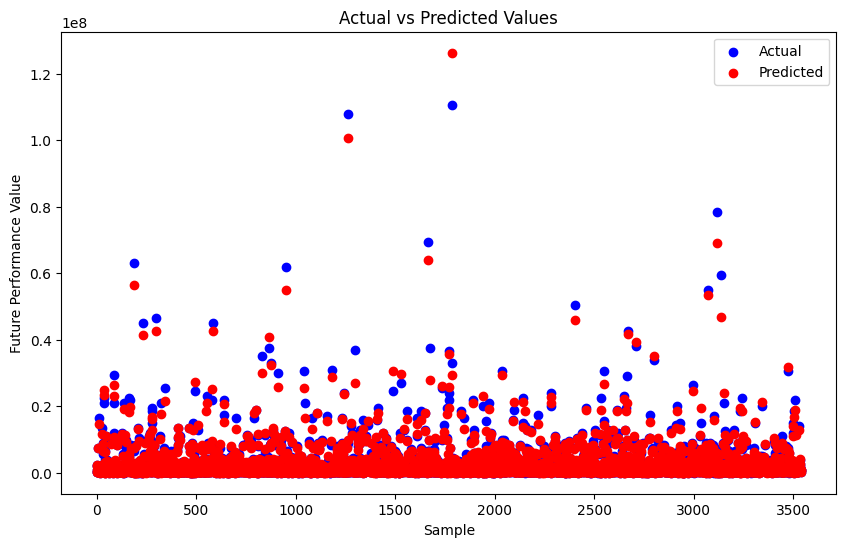

In [16]:
# Step 19 - Predict the future performance
y_pred = best_model.predict(features_test)

# Step 20 - Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(range(len(target_test)), target_test, color='blue', label='Actual')
plt.scatter(range(len(target_test)), y_pred, color='red', label='Predicted')
plt.title('Actual vs Predicted Values')
plt.xlabel('Sample')
plt.ylabel('Future Performance Value')
plt.legend()
plt.show()

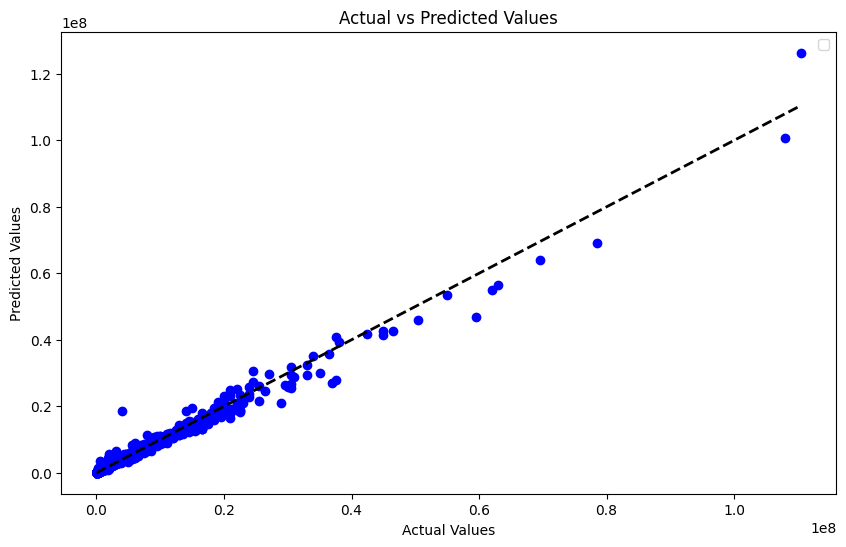

In [17]:
# Step 21 - Plotting Predicted vs Actual Values Scatter Plot Line

plt.figure(figsize=(10, 6))
plt.scatter(target_test, y_pred, color='blue')
plt.plot([target_test.min(), target_test.max()], [target_test.min(), target_test.max()], 'k--', lw=2)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

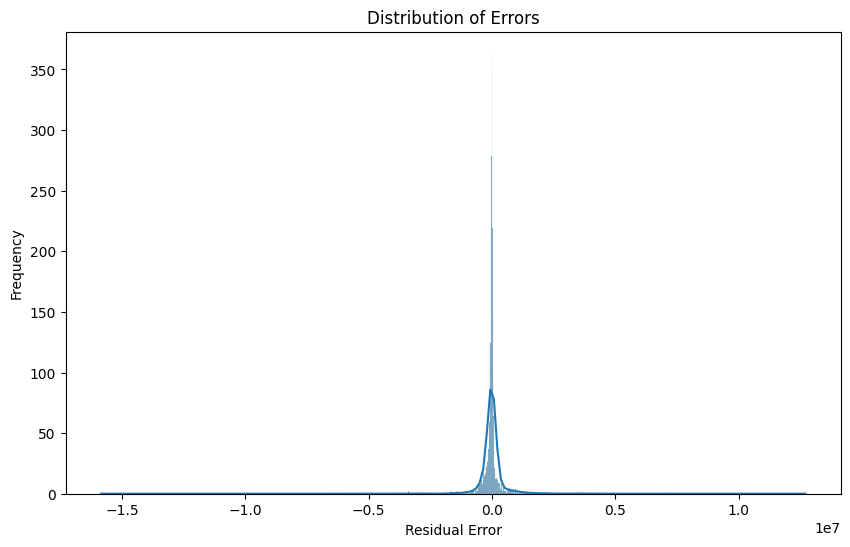

In [18]:
# Step 22 - Distribution of Errors

residuals = target_test - y_pred.flatten()
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Distribution of Errors')
plt.xlabel('Residual Error')
plt.ylabel('Frequency')
plt.show()